Ten eerste willen we inzicht krijgen in de data dit doen we door met behulp van pandas de data in te laden uit de csv. Daarnaast is het handig om het pad naar de images direct op te slaan.

In [1]:
import pandas as pd
import os
import skimage
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bees_df = pd.read_csv('bee_data.csv')
bees_df.sample(100).head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
1439,005_430.png,7/7/18,12:56,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
2012,016_162.png,8/20/18,11:55,"San Jose, CA, USA",95124,-1,healthy,False,worker
2263,046_175.png,8/19/18,15:46,"Des Moines, IA, USA",50315,Carniolan honey bee,healthy,False,worker
1675,040_398.png,8/21/18,15:56,"Athens, GA, USA",30607,Italian honey bee,"few varrao, hive beetles",False,worker
2905,010_621.png,8/19/18,12:46,"Des Moines, IA, USA",50315,Carniolan honey bee,healthy,False,worker


In [3]:
IMG_PATH = "./bee_imgs/bee_imgs/"

In [4]:
bees_df.shape

(5172, 9)

In [5]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(bees_df)

,Total,Percent
file,0,0.0
date,0,0.0
time,0,0.0
location,0,0.0
zip code,0,0.0
subspecies,0,0.0
health,0,0.0
pollen_carrying,0,0.0
caste,0,0.0


In [6]:
image_files = list(os.listdir(IMG_PATH))
print("Number of image files: {}".format(len(image_files)))

Number of image files: 5172


In [7]:
file_names = list(bees_df['file'])
print("Matching image names: {}".format(len(set(file_names).intersection(image_files))))

Matching image names: 5172


In [8]:
def read_image_sizes(file_name):
    image = skimage.io.imread(IMG_PATH + file_name)
    return list(image.shape)
print(read_image_sizes("001_043.png"))

[64, 68, 3]


In [9]:
# imagenames = bees_df.loc[:, "file"]
# for index, value in imagenames.items():
#     m = np.stack(bees_df['file'].apply(read_image_sizes))
#     df = pd.DataFrame(m,columns=['w','h','c'])
#     bees_df = pd.concat([bees_df, df], axis = 1, sort=False)

In [10]:
# Fixing random state for reproducibility
# np.random.seed(19680801)
# N = 50
# x = np.random.rand(N)
# y = np.random.rand(N)
# colors = np.random.rand(N)
# area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
# plt.scatter(x, y, s=area, c=colors, alpha=0.5)
# plt.show()

In [11]:
health = bees_df['health']
health_mask = health == "healthy"
healthy_bees_df = bees_df.loc[health_mask]
unhealthy_mask = health != "healthy"
unhealthy_bees_df = bees_df.loc[unhealthy_mask]

['-1' 'Italian honey bee' 'VSH Italian honey bee' 'Carniolan honey bee'
 'Russian honey bee' '1 Mixed local stock 2' 'Western honey bee']


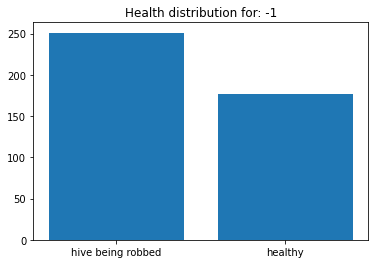

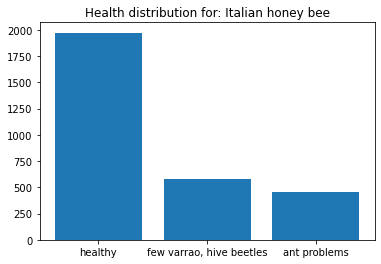

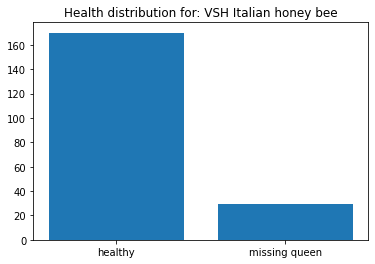

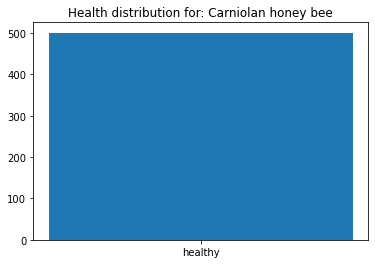

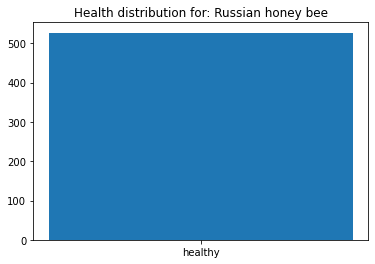

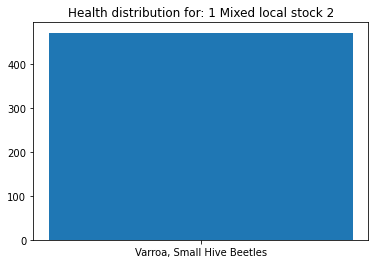

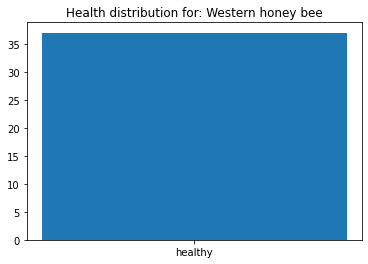

In [12]:
subspecies = bees_df.loc[:, 'subspecies']
names = subspecies.unique()
print(names)
for name in names:
    subspecies_mask = subspecies == name
    subspecies_bees_df = bees_df.loc[subspecies_mask]
    health_subspecies = subspecies_bees_df.loc[:,'health']
    subspecies_count = subspecies_bees_df['health'].value_counts()
    subspecies_count_df = pd.DataFrame(subspecies_count)
    healthdist_subspecies = subspecies_count_df.iloc[:,0]
    x = subspecies_count.index.values.tolist()
    y = healthdist_subspecies.values.tolist()
    plt.bar(x,y)
    plt.title("Health distribution for: " + name)
    plt.show()
    

In [13]:
health = bees_df.loc[:,'health']
hivebeetles1_mask = health == 'Varroa, Small Hive Beetles'
hivebeetles2_mask = health == 'few varrao, hive beetles'

hivebeetles = bees_df.loc[hivebeetles1_mask|hivebeetles2_mask]

bees_df['health'] = bees_df['health'].replace(['Varroa, Small Hive Beetles', 'few varrao, hive beetles'], 'Varroa, Hive Beetles')

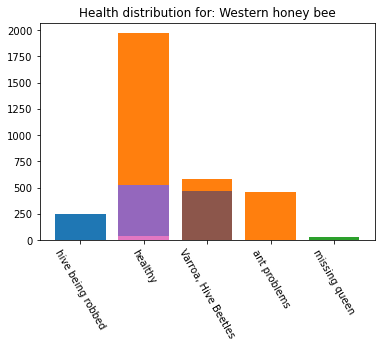

In [14]:
for name in names:
    subspecies_mask = subspecies == name
    subspecies_bees_df = bees_df.loc[subspecies_mask]
    health_subspecies = subspecies_bees_df.loc[:,'health']
    subspecies_count = subspecies_bees_df['health'].value_counts()
    subspecies_count_df = pd.DataFrame(subspecies_count)
    healthdist_subspecies = subspecies_count_df.iloc[:,0]
    x = subspecies_count.index.values.tolist()
    y = healthdist_subspecies.values.tolist()
    plt.bar(x,y)
    plt.title("Health distribution for: " + name)
    plt.xticks(rotation=300)
    # plt.show()
    

DateTime manip

In [23]:
bees_df['date_time'] = pd.to_datetime(bees_df['date'] + ' ' + bees_df['time'])
bees_df["year"] = bees_df['date_time'].dt.year
bees_df["month"] = bees_df['date_time'].dt.month
bees_df["day"] = bees_df['date_time'].dt.day
bees_df["hour"] = bees_df['date_time'].dt.hour
bees_df["minute"] = bees_df['date_time'].dt.minute

tmp = bees_df.groupby(['subspecies'])['year'].value_counts()
df = pd.DataFrame(data={'Images': tmp.values}, index=tmp.index).reset_index()
df

,subspecies,year,Images
0,-1,2018,428
1,1 Mixed local stock 2,2018,472
2,Carniolan honey bee,2018,501
3,Italian honey bee,2018,3008
4,Russian honey bee,2018,527
5,VSH Italian honey bee,2018,199
6,Western honey bee,2018,37


<BarContainer object of 5172 artists>

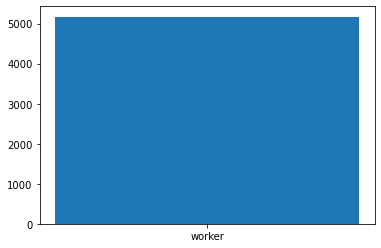

In [17]:
x = bees_df['caste']
y = bees_df['caste'].value_counts()
plt.bar(x,y)

In [18]:
tmp = bees_df.groupby(['zip code'])['location'].value_counts()
df = pd.DataFrame(data={'Images': tmp.values}, index=tmp.index).reset_index()
df

,zip code,location,Images
0,3431,"Keene, NH, USA",92
1,30607,"Athens, GA, USA",579
2,30607,"Athens, Georgia, USA",472
3,50315,"Des Moines, IA, USA",973
4,70115,"New Orleans, LA, USA",170
5,77511,"Alvin, TX, USA",737
6,95070,"Saratoga, CA, USA",2000
7,95124,"San Jose, CA, USA",149


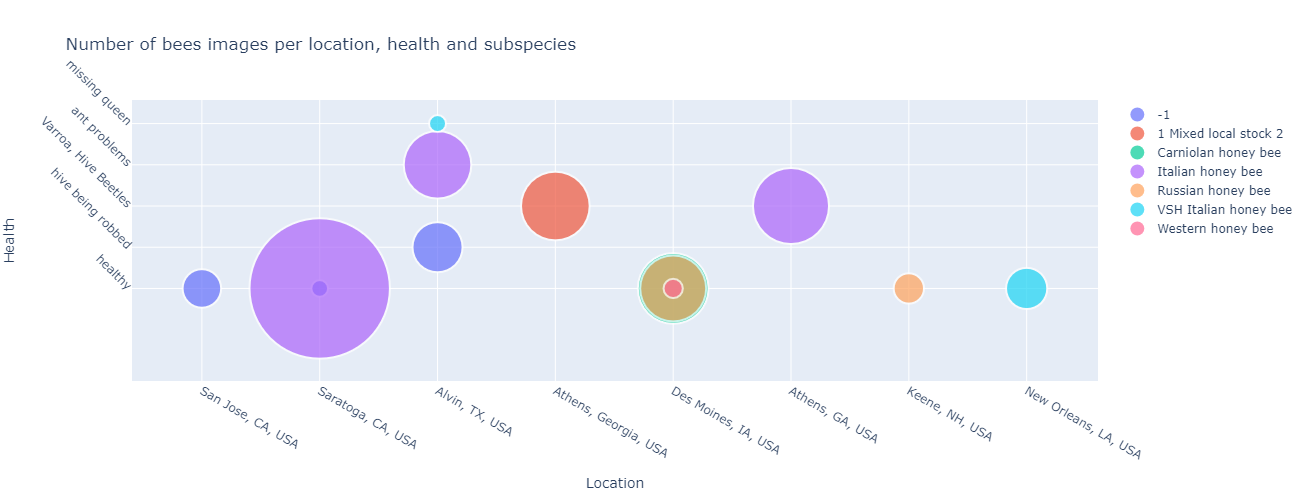

In [27]:
import plotly.graph_objs as go
from plotly.offline import iplot
tmp = bees_df.groupby(['health', 'location'])['subspecies'].value_counts()
df = pd.DataFrame(data={'Images': tmp.values}, index=tmp.index).reset_index()
hover_text = []
for index, row in df.iterrows():
    hover_text.append(('Subspecies: {}<br>'+
                      'Health: {}<br>'+
                      'Location: {}<br>'+
                      'Images: {}').format(row['subspecies'],
                                            row['health'],
                                            row['location'],
                                            row['Images']))
df['hover_text'] = hover_text
subspecies = (bees_df.groupby(['subspecies'])['subspecies'].nunique()).index
data = []
for subs in subspecies:
    dfL = df[df['subspecies']==subs]
    trace = go.Scatter(
        x = dfL['location'],y = dfL['health'],
        name=subs,
        marker=dict(
            symbol='circle',
            sizemode='area',
            sizeref=0.2,
            size=dfL['Images'],
            line=dict(
                width=2
            ),),
        mode = "markers",
        text=dfL['hover_text'],
    )
    data.append(trace)
    
layout = dict(title = 'Number of bees images per location, health and subspecies',
          xaxis = dict(title = 'Location', showticklabels=True), 
          yaxis = dict(title = 'Health', tickangle=45),
          hovermode = 'closest',
          height=500,
         )
fig = dict(data = data, layout = layout)
iplot(fig, filename='images-subspecies-health-location')

In [39]:
import imageio
def draw_category_images(var,cols=5):
    categories = (bees_df.groupby([var])[var].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=cols, figsize=(2*cols,2*len(categories)))
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = bees_df[bees_df[var]==cat].sample(cols)
        for j in range(0,cols):
            file=IMG_PATH + sample.iloc[j]['file']
            im=imageio.imread(file)
            ax[i, j].imshow(im, resample=True)
            ax[i, j].set_title(cat, fontsize=9)  
    plt.tight_layout()
    plt.show()

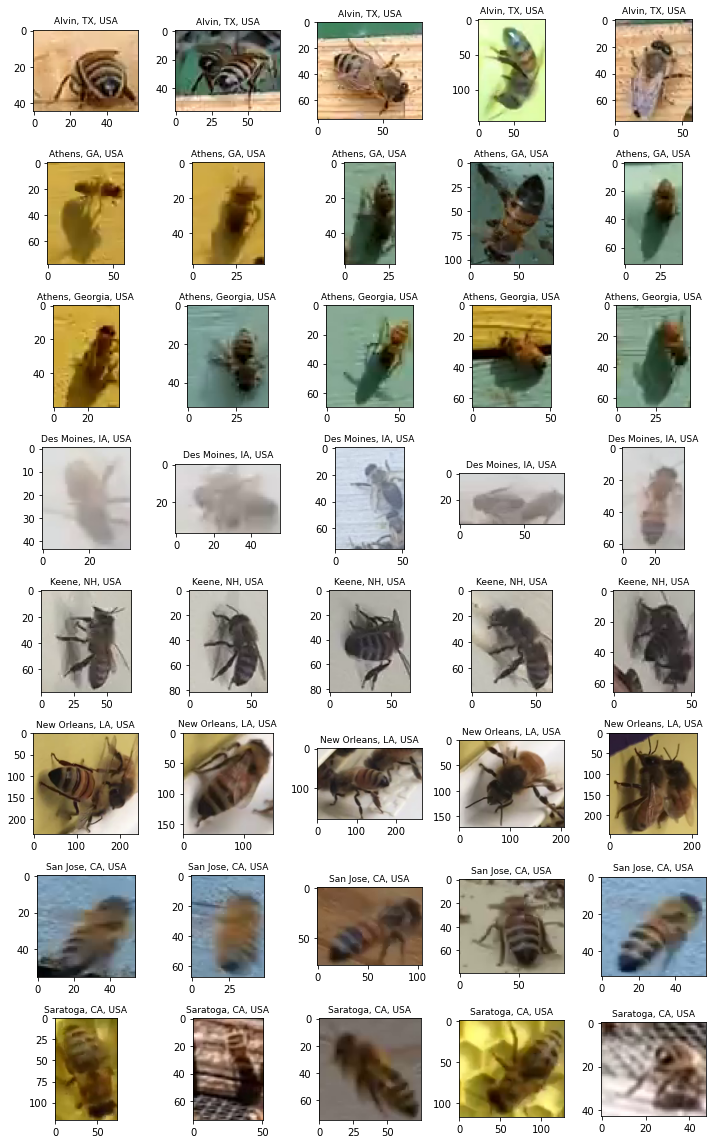

In [40]:
draw_category_images("location")

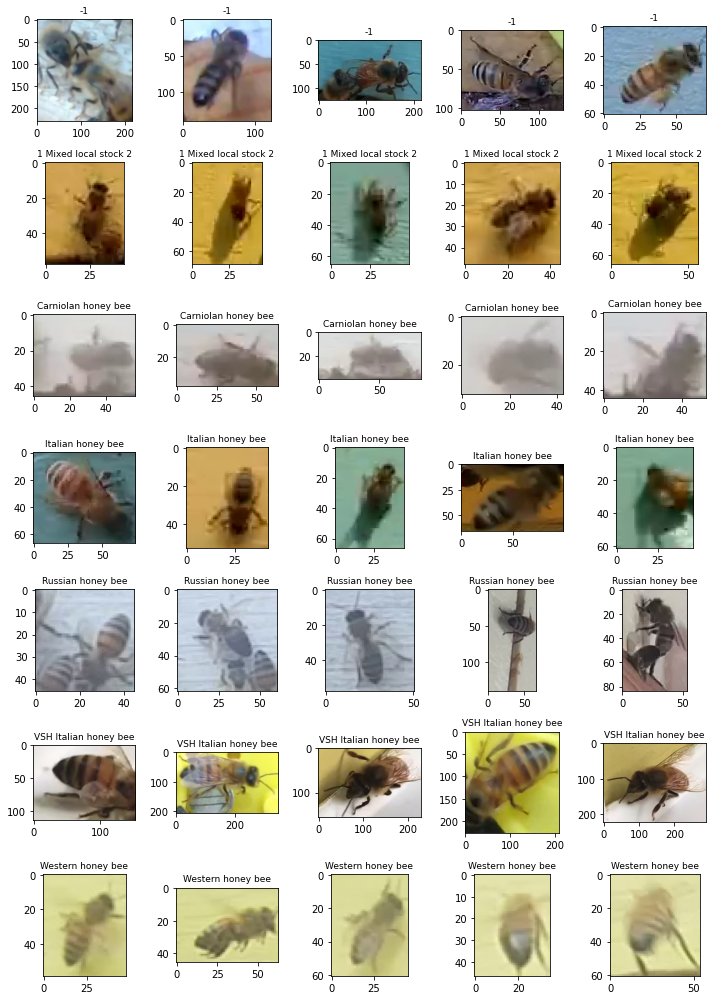

In [41]:
draw_category_images("subspecies")

Change VSH italian honey bee to Italian honey bee as there is no visible difference between the two

In [49]:
bees_df['subspecies'] = bees_df['subspecies'].replace(['VSH Italian honey bee'], 'Italian honey bee')
italian_bee_mask = subspecies == 'Italian honey bee'

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste,date_time,year,month,day,hour,minute
74,017_029.png,8/6/18,13:21,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker,2018-08-06 13:21:00,2018,8,6,13,21
75,017_015.png,8/6/18,13:21,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker,2018-08-06 13:21:00,2018,8,6,13,21
76,017_001.png,8/6/18,13:21,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker,2018-08-06 13:21:00,2018,8,6,13,21
77,017_000.png,8/6/18,13:21,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker,2018-08-06 13:21:00,2018,8,6,13,21
78,017_014.png,8/6/18,13:21,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker,2018-08-06 13:21:00,2018,8,6,13,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5111,021_233.png,8/8/18,21:13,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker,2018-08-08 21:13:00,2018,8,8,21,13
5112,021_231.png,8/8/18,21:13,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker,2018-08-08 21:13:00,2018,8,8,21,13
5115,006_004.png,7/7/18,14:00,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker,2018-07-07 14:00:00,2018,7,7,14,0
5116,006_005.png,7/7/18,14:00,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker,2018-07-07 14:00:00,2018,7,7,14,0
